In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('housing.csv')

df.shape



(20640, 10)

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
df.value_counts()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  ocean_proximity
-124.35    40.54     52.0                1820.0       300.0           806.0       270.0       3.0147         94600.0             NEAR OCEAN         1
-118.19    34.12     35.0                2524.0       749.0           2487.0      679.0       2.4932         167700.0            <1H OCEAN          1
           34.13     52.0                2012.0       458.0           1314.0      434.0       3.9250         180400.0            <1H OCEAN          1
                     50.0                1309.0       302.0           883.0       293.0       3.1287         198000.0            <1H OCEAN          1
           34.12     52.0                679.0        132.0           483.0       163.0       4.2344         162500.0            <1H OCEAN          1
                                                                                                         

In [8]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [46]:
df.duplicated().sum()

np.int64(0)

In [15]:
print(df.isnull().sum() / len(df) * 100)  # в процентах

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
ocean_proximity       0.0
dtype: float64


In [14]:
df = df.dropna(subset=['total_bedrooms'])
print(df['total_bedrooms'].isnull().sum())

0


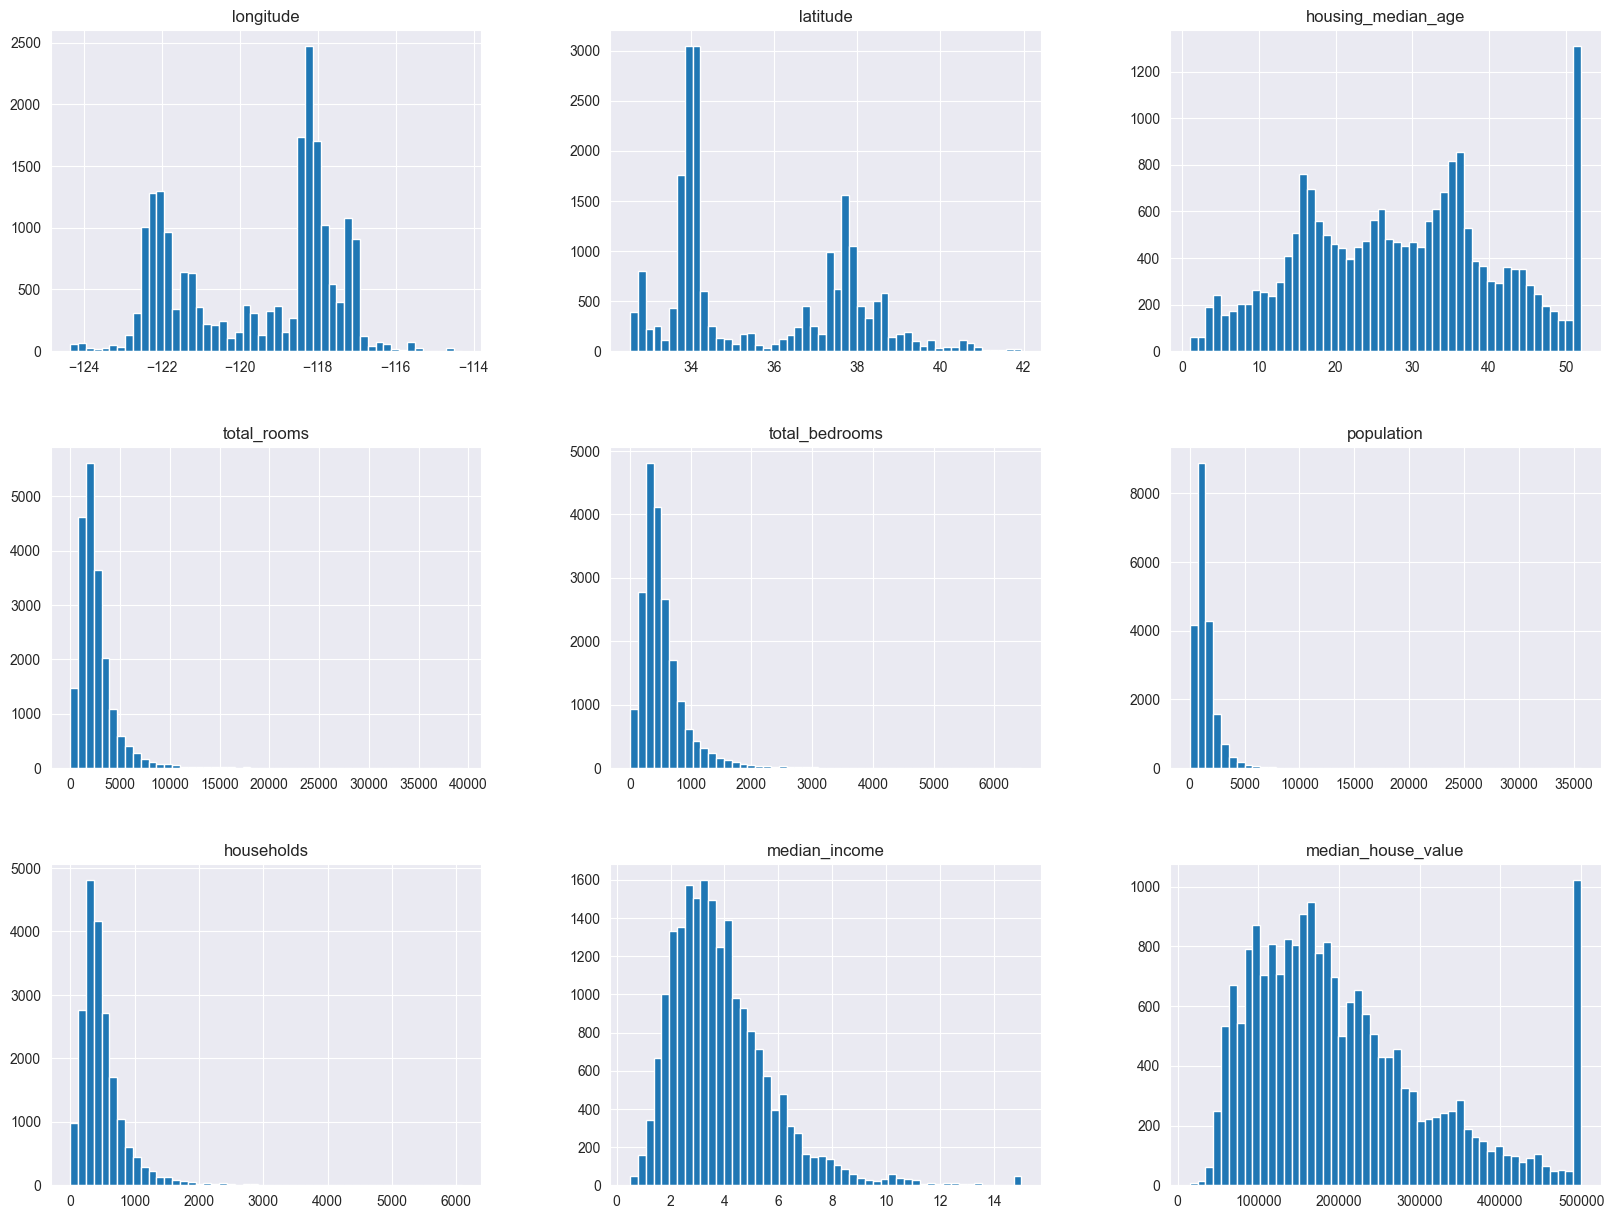

In [16]:
df.hist(bins=50, figsize=(20,15))
plt.show()

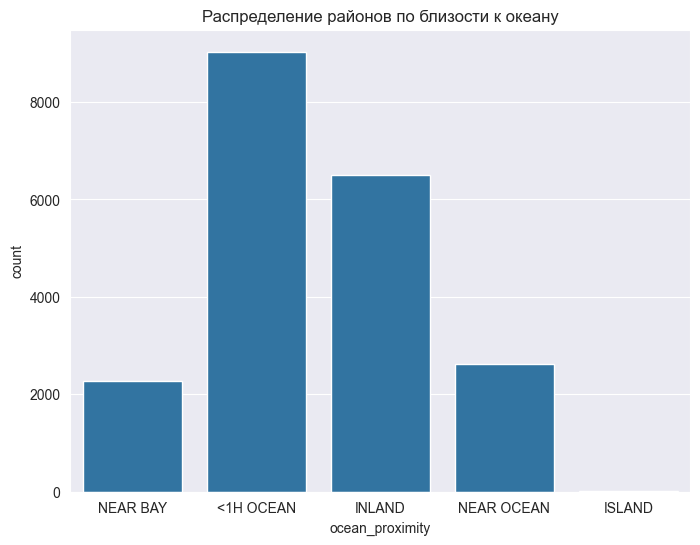

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(x='ocean_proximity', data=df)
plt.title("Распределение районов по близости к океану")
plt.show()


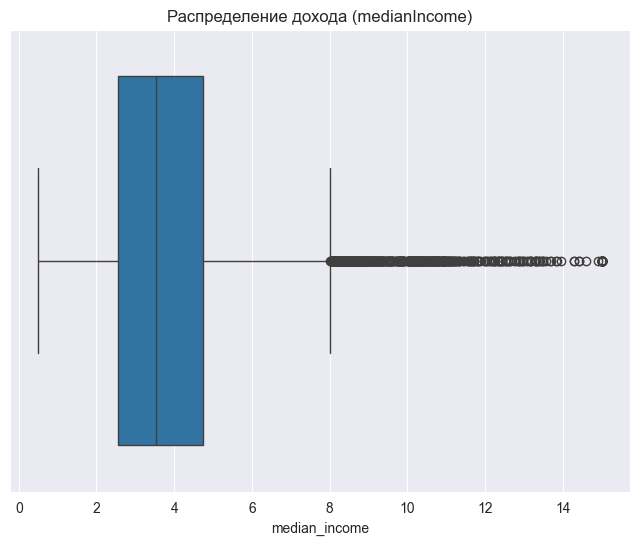

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['median_income'])
plt.title("Распределение дохода (medianIncome)")
plt.show()

In [39]:
max_income_row = df.loc[df['median_house_value'].idxmax()]
print(max_income_row['median_house_value'])
print(max_income_row['median_income'])


500001.0
1.2434


In [40]:
print(max_income_row['longitude'])
print(max_income_row['latitude'])

-122.27
37.8


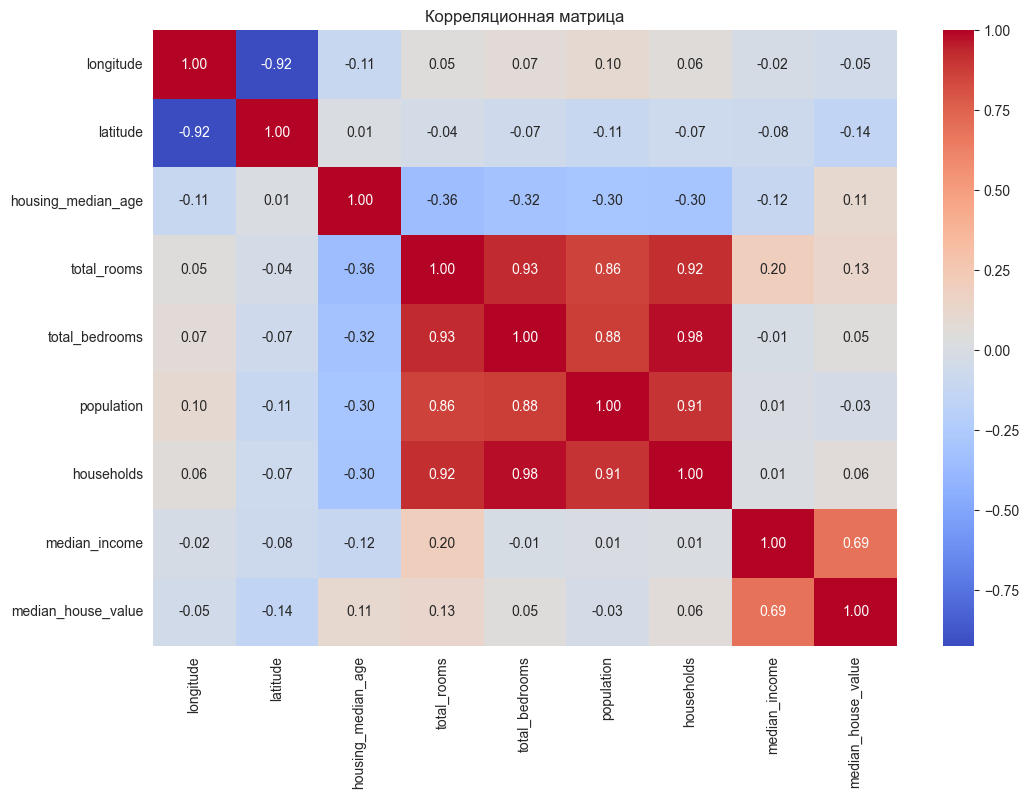

In [30]:
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)  # корреляции только числовых
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()

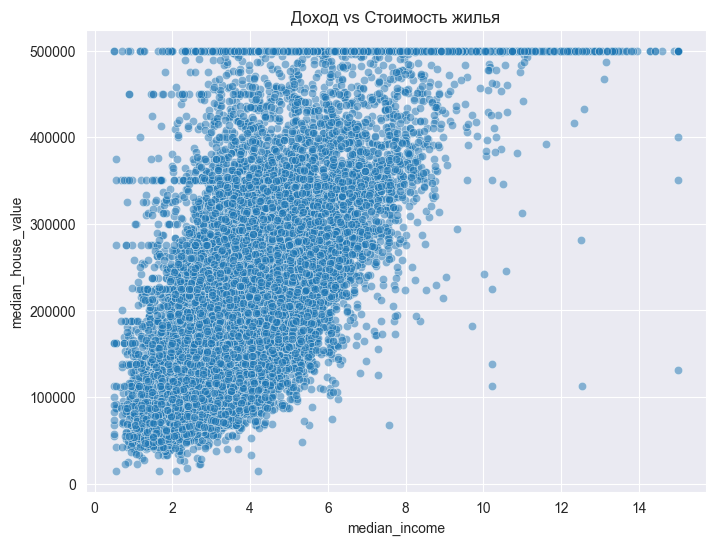

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='median_income', y='median_house_value', data=df, alpha=0.5)
plt.title("Доход vs Стоимость жилья")
plt.show()


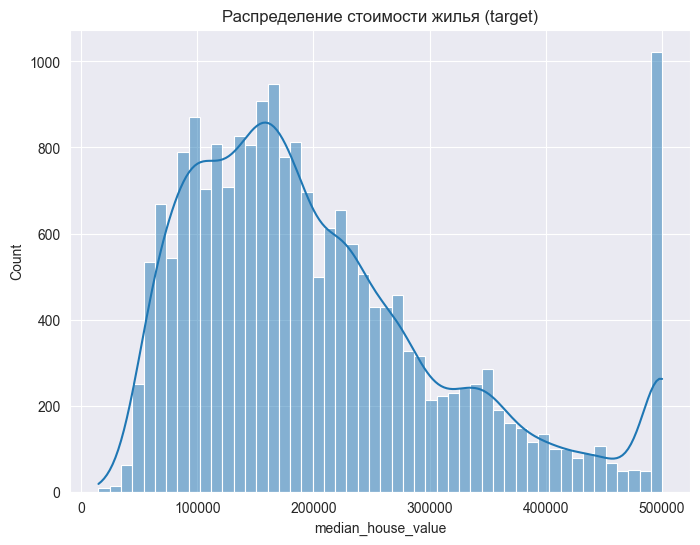

In [42]:
plt.figure(figsize=(8,6))
sns.histplot(df['median_house_value'], bins=50, kde=True)
plt.title("Распределение стоимости жилья (target)")
plt.show()

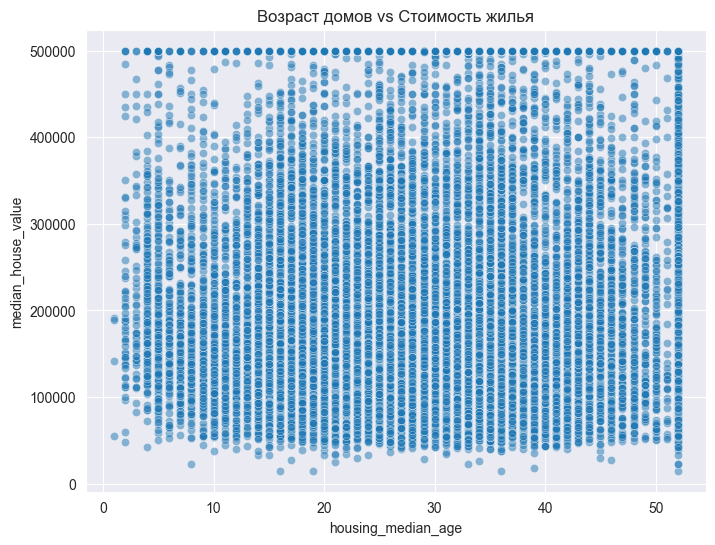

In [45]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='housing_median_age', y='median_house_value', data=df, alpha=0.5)
plt.title("Возраст домов vs Стоимость жилья")
plt.show()

